## Import Necessary Packages

In [1]:
import glob
import numpy as np
import xarray as xr
import proplot as pplt
pplt.rc.update({'font.size':12})
import warnings
warnings.filterwarnings('ignore')

## User-Defined Fields

In [2]:
path  = # '/directory/where/large/domain/files/are/located/'
cases = ['nz_32','nz_64','nz_128']
beforeagg = ['0000028800','0000072000','00008640'] # time string for simulation day 5 for each case
duringagg = ['0000864000','0002160000','00259200'] # time string for simulation day 150 for each case

## Plot Fig. 4

Load in and plot snapshots of precipitatable water $PW$ for a simulation day before (day 5) and during (day 150) convective aggregation (```beforeagg``` and ```duringagg```, respectively) for each case.

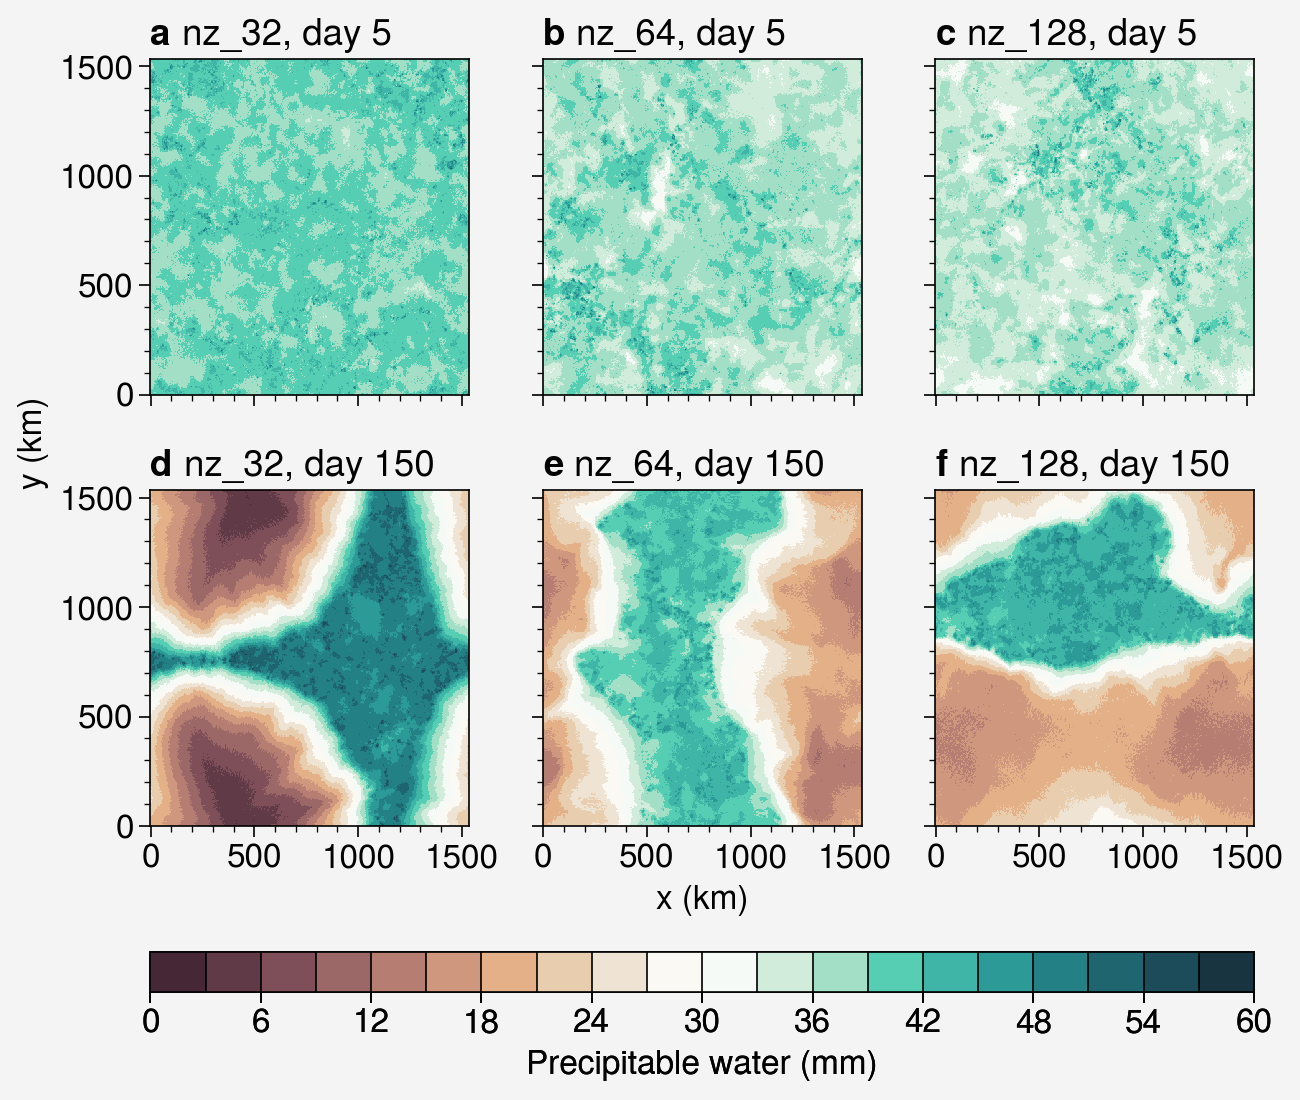

In [3]:
cmap='DryWet'; levels=20; vmin=0; vmax=60
fig,axs = pplt.subplots(nrows=2,ncols=3,width=6.5,height=5.5)
axs.format(xlabel='x (km)',xticks=500,ylabel='y (km)',yticks=500,abc='a',abcloc='l',titleloc='l')
for i,case in enumerate(cases):
    ## Plot PW Before Aggregation
    beforefiles = np.sort(glob.glob(path+case+'/OUT_2D/PW/*'+beforeagg[i]+'*.nc'))[0]
    pwbefore = xr.open_dataset(beforefiles).PW
    x,y = pwbefore[0].x/1000,pwbefore[0].y/1000
    plots = axs[i].pcolormesh(x,y,np.squeeze(pwbefore),levels=levels,vmin=vmin,vmax=vmax,cmap=cmap)
    axs[i].format(title=case+', day 5')
    ## Plot PW During Aggregation
    duringfiles = np.sort(glob.glob(path+case+'/OUT_2D/PW/*'+duringagg[i]+'*.nc'))[0]
    pwduring = xr.open_dataset(duringfiles).PW    
    x,y = pwduring[0].x/1000,pwduring[0].y/1000
    axs[i+3].pcolormesh(x,y,np.squeeze(pwduring),levels=levels,vmin=vmin,vmax=vmax,cmap=cmap)
    axs[i+3].format(title=case+', day 150')
fig.colorbar(plots,loc='b',grid=True,label='Precipitable water (mm)')